In [3]:
import harmonica as hm
import numpy as np
import verde as vd
import xarray as xr
import magali as mg

In [20]:

sensor_sample_distance = 5.0  # µm
coordinates = vd.grid_coordinates(
    region=[0, 2000, 0, 2000],  # µm
    spacing=2,  # µm
    extra_coords=sensor_sample_distance,
)

true_inclination = 30
true_declination = 40
true_dispersion_angle = 5


size = 100

directions_inclination, directions_declination = mg.random_directions(
    true_inclination,
    true_declination,
    true_dispersion_angle,
    size=size,
    random_state=5,
)

dipoles_amplitude = abs(np.random.normal(0, 100, size)) * 1.0e-14

dipole_coordinates = (
    np.concatenate([np.random.randint(30, 1970, size), [1250, 1300, 500]]),  # µm
    np.concatenate([np.random.randint(30, 1970, size), [500, 1750, 1000]]),  # µm
    np.concatenate([np.random.randint(-20, -1, size), [-15, -15, -30]]),  # µm
)
dipole_moments = hm.magnetic_angles_to_vec(
    inclination=np.concatenate([directions_inclination, [10, -10, -5]]),
    declination=np.concatenate([directions_declination, [10, 170, 190]]),
    intensity=np.concatenate([dipoles_amplitude, [5e-11, 5e-11, 5e-11]]),
)

data = mg.dipole_bz_grid(
    region, spacing, sensor_sample_distance, dipole_coordinates, dipole_moments
)
data

<xarray.DataArray 'bz' (y: 1001, x: 1001)> Size: 8MB
array([[ 3.60021882,  3.61834961,  3.63656673, ..., 19.39557958,
        19.31474895, 19.22807408],
       [ 3.62244456,  3.64072695,  3.65909576, ..., 19.89360349,
        19.80989045, 19.719968  ],
       [ 3.64485157,  3.6632858 ,  3.68180645, ..., 20.41238534,
        20.32561056, 20.23223455],
       ...,
       [ 7.28172975,  7.40137667,  7.52394936, ...,  0.49062072,
         0.4987187 ,  0.50663444],
       [ 7.18886896,  7.30655632,  7.42713543, ...,  0.47725459,
         0.48541183,  0.49338742],
       [ 7.09747098,  7.21321891,  7.33182235, ...,  0.46410277,
         0.47231692,  0.48035003]])
Coordinates:
  * x        (x) float64 8kB 0.0 2.0 4.0 6.0 ... 1.996e+03 1.998e+03 2e+03
  * y        (y) float64 8kB 0.0 2.0 4.0 6.0 ... 1.996e+03 1.998e+03 2e+03
    z        (y, x) float64 8MB 5.0 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0 5.0
Attributes:
    long_name:  vertical magnetic field
    units:      nT

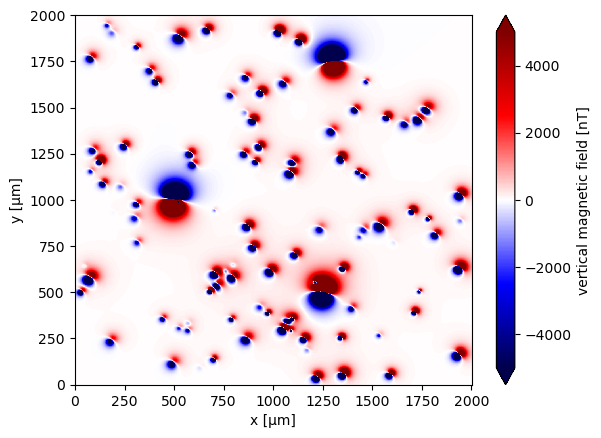

In [21]:
data.plot.pcolormesh(cmap="seismic", vmin=-5000, vmax=5000)

In [24]:
deriv_x = hm.derivative_easting(data)
deriv_y = hm.derivative_northing(data)

In [25]:
spacing = np.mean([np.abs(data.x[1] - data.x[0]), np.abs(data.y[1] - data.y[0])])

In [26]:
data_up = hm.upward_continuation(data, spacing).assign_coords(x=data.x, y=data.y)
data_down = hm.upward_continuation(data, -spacing).assign_coords(x=data.x, y=data.y)
deriv_z = (data_up - data_down) / (2 * spacing)

/home/yago/miniforge3/envs/magali/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/yago/miniforge3/envs/magali/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


In [30]:
tga = np.sqrt(deriv_x**2 + deriv_y**2 + deriv_z**2)